In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete")

Setup complete


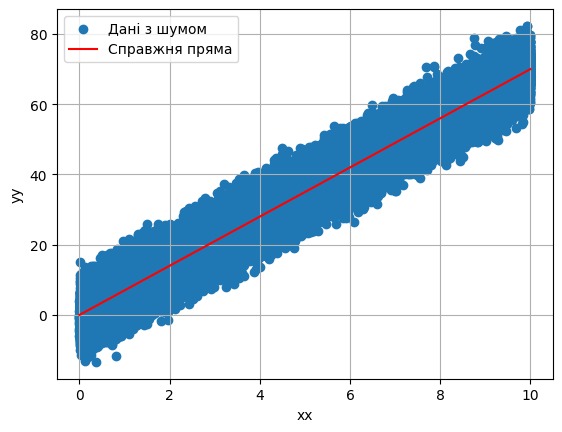

In [2]:
kk = 7
bb = 0
N = 10_000_0
xx = np.linspace(0, 10, N)

noise = np.random.normal(0, 4, N)
yy = kk * xx + bb + noise

plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

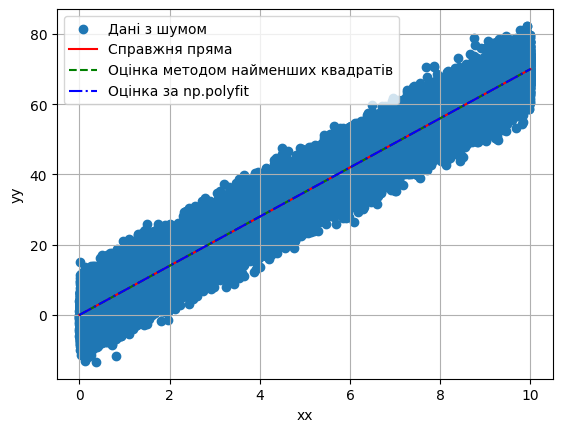

Параметри справжньої прямої:
kk = 7
bb = 0

Оцінки параметрів за методом найменших квадратів:
kk_hat = 6.999978689801719
bb_hat = 0.006458306568572297

Оцінки параметрів за np.polyfit:
kk_np_polyfit = 6.999978689801743
bb_np_polyfit = 0.006458306568514618


In [3]:
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    kk_hat1 = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb_hat1 = (sum_y - kk_hat1 * sum_x) / n
    
    return kk_hat1, bb_hat1

kk_hat, bb_hat = least_squares_method(xx, yy)

coefficients = np.polyfit(xx, yy, 1)
kk_np_polyfit = coefficients[0]
bb_np_polyfit = coefficients[1]

plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.plot(xx, kk_hat * xx + bb_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(xx, kk_np_polyfit * xx + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

print("Параметри справжньої прямої:")
print("kk =", kk)
print("bb =", bb)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("kk_hat =", kk_hat)
print("bb_hat =", bb_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("kk_np_polyfit =", kk_np_polyfit)
print("bb_np_polyfit =", bb_np_polyfit)

6.3671014496381915 4.194718020882787


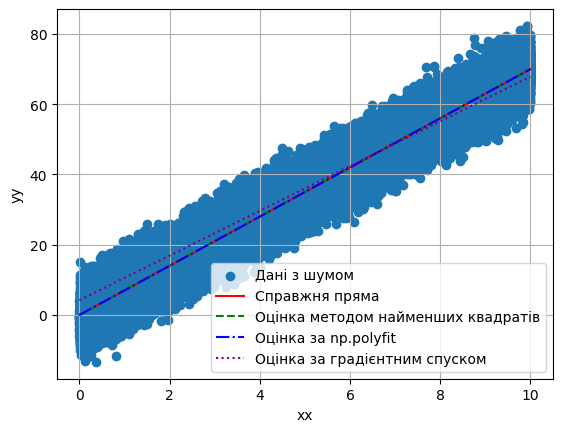

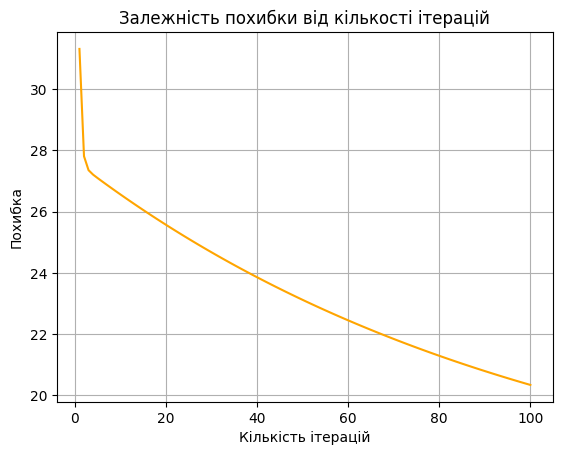

In [4]:
def gradient_descent(x, y, learning_rate1, n_iter1):
    kk_hat1 = 7
    bb_hat1 = 7
    n = len(x)
    
    if n_iter1 <= 0 or learning_rate1 <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    for _ in range(n_iter1):
        y_pred = kk_hat1 * x + bb_hat1
        gradient_kk = (-2/n) * np.sum(x * (y - y_pred))
        gradient_bb = (-2/n) * np.sum(y - y_pred)

        kk_hat1 -= learning_rate1 * gradient_kk
        bb_hat1 -= learning_rate1 * gradient_bb
    
    return kk_hat1, bb_hat1

learning_rate = 0.01
n_iter = 100

kk_gradient, bb_gradient = gradient_descent(xx, yy, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.plot(xx, kk_hat * xx + bb_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(xx, kk_np_polyfit * xx + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
plt.plot(xx, kk_gradient * xx + bb_gradient, color='purple', linestyle=':', label='Оцінка за градієнтним спуском')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

def loss_function(x, y, kk1, bb1):
    """обчислює середньоквадратичну помилку між прогнозованими значеннями y_pred та істинними значеннями y"""
    y_pred = kk1 * x + bb1
    return np.mean((y_pred - y) ** 2)


errors = []
iterations = range(1, n_iter + 1)
for i in iterations:
    kk_gradient, bb_gradient = gradient_descent(xx, yy, learning_rate, i)
    error = loss_function(xx, yy, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='orange')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()